In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np


from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from sklearn.preprocessing import MinMaxScaler, Imputer
import xgboost as xgb
import operator
import gc
import myutil

In [2]:
class XgbWrapper(object):
    def __init__(self, seed=0, params=None):
        self.param = params
        self.param['seed'] = seed
        self.nrounds = params.pop('nrounds', 250)
        
    def init_model(self):
        return  
    def __repr__(self):
        return 'xgb'

    def train(self, x_train, y_train):
        self.dtrain = xgb.DMatrix(x_train, label=y_train)
        self.gbdt = xgb.train(self.param, self.dtrain, self.nrounds)

    def predict(self, x):
        result = self.gbdt.predict(xgb.DMatrix(x))
        return result
    
    def get_coef(self):
        importance = self.gbdt.get_fscore()
        importance_df = pd.DataFrame(
                            sorted(importance.items(), key=operator.itemgetter(1)), 
                            columns=['feature','fscore']
                        )
        return importance_df['fscore']

xgb_params = {
    'seed': 0,
    'colsample_bytree': 0.7,
    'silent': 1,
    'subsample': 0.7,
    'learning_rate': 0.075,
    'objective': 'binary:logistic',
    'max_depth': 4,
    'num_parallel_tree': 1,
    'min_child_weight': 1,
    'nrounds': 200
}

xg = XgbWrapper(seed=0, params=xgb_params)

In [3]:
# Build model inputs
data, test, y = myutil.get_train_test_label()


train datasset shape: (307511, 828)
test datasset shape: (48744, 828)


In [4]:
oof_preds, test_preds, importances, folds = myutil.cross_validation(data, test, y, xg)

Fold  1 AUC : 0.782528
Fold  2 AUC : 0.780082
Fold  3 AUC : 0.781090
Fold  4 AUC : 0.783285
Fold  5 AUC : 0.776712
Full AUC score 0.780723


xgb


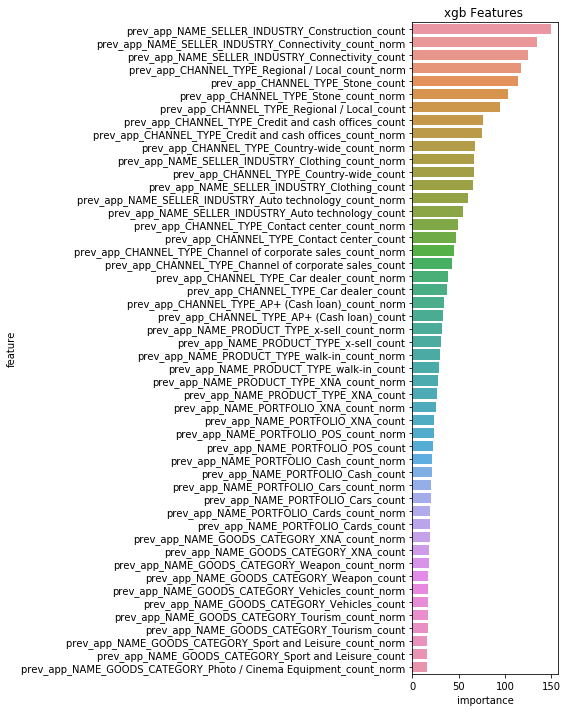

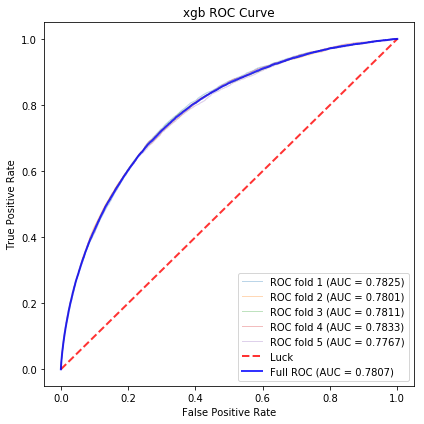

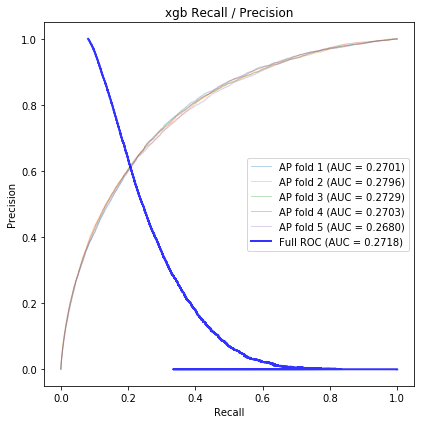

In [5]:
title = 'xgb'
myutil.report(test_preds, folds, importances, data, y, oof_preds, title, True)

In [6]:
oof_preds, test_preds, importances, folds = myutil.cross_validation_undersample(data, test, y, xg)

total n fold : 11
Fold  1 AUC : 0.501465
Fold  2 AUC : 0.499296
Fold  3 AUC : 0.500099
Fold  4 AUC : 0.502292
Fold  5 AUC : 0.500998
Fold  6 AUC : 0.500123
Fold  7 AUC : 0.508724
Fold  8 AUC : 0.499455
Fold  9 AUC : 0.500998
Fold 10 AUC : 0.500876
Fold 11 AUC : 0.507649
Full AUC score 0.922297


xgb_undersample


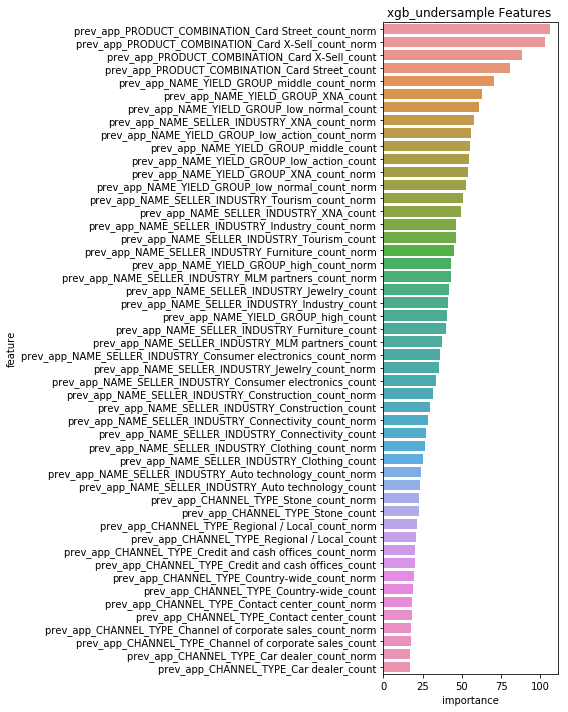

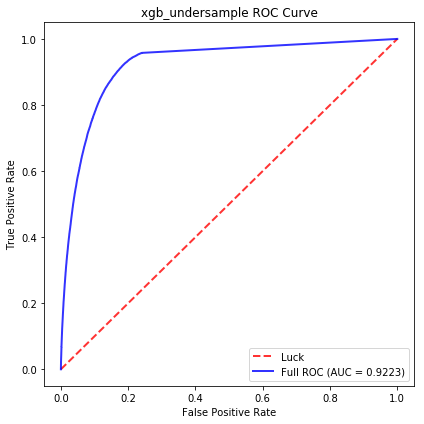

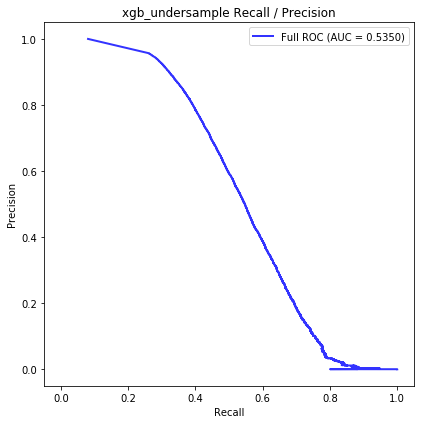

In [7]:
title = 'xgb_undersample'
myutil.report(test_preds, folds, importances, data, y, oof_preds, title, False)